### The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

##### This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

##### Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

##### Importing required modules for analysis.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Loading the data

- To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

- In the next steps, `Species_info.csv` and `Observations.csv`  are read in as `DataFrames` called `dataset 1` and `dataset 2` respectively. The newly created `DataFrames` are glimpsed with `.head()` and `info()` to check its contents and what is the information stored in the dataset respectively.

### Species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:

- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [66]:
species = pd.read_csv('species_info.csv')

species.head()


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [68]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### Observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [72]:
observation = pd.read_csv('observations.csv')
observation.head()


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [74]:
observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


#### Data charecteristics


- we need to know the dimensions of the dataset. So, `species_info.csv` has 5824 rows and 4 columns. whereas `obsevations.csv` has 23296 rows and 3 columns

In [77]:
print(f"species shape: {species.shape}")
print(f"observation shape: {observation.shape}")

species shape: (5824, 4)
observation shape: (23296, 3)


#### Explore the Data

- In `species_info.csv` I need to find unique species in the data and the number of categories of each species. There are 7 category including animals and plants.
- In `observation.csv` I will drill one level deeper to find out the count of each category in the data.
- Another column we want to explore is `conservation_status` in `species_info.csv` dataset.  

In [80]:
print(f"number of species:{species.scientific_name.nunique()}")
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

number of species:5541
nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


- Here I am going to count number of species in each category.

In [85]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

- Next `observation` data. The first task is to find all the national parks that are there in the dataset and there are only 4 national parks.

In [88]:
print(f"number of parks:{observation.park_name.nunique()}")
print(f"unique parks:{observation.park_name.unique()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


- Here are total number of observations logged in each park, there are 3,314,739 sightings in the last 7 days.

In [96]:
print(f"number of observation:{observation.observations.sum()}")

number of observation:3314739


- In the below cell i will give the breakdown of categories in `conservation_status`. there are also `nan values`.
  - In the dataset `nan values` represent the species without concern.
  - note:- every `nan value` you come across must be treated carefully.

In [103]:
print(f"na values:{species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


#### Analysis

- This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the conservation_status column in species.

##### The column conservation_status has several possible values:

- Species of Concern: declining or appear to be in need of conservation.
- Threatened: vulnerable to endangerment in the near future.
- Endangered: seriously at risk of extinction.
- In Recovery: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range.

#### Handling missing values
- If the missing values are categorical, you can treat them as a separate category. it's generally a good practice to handle missing values before plotting.
- Here we will give `nan values` seperate category called **Missing**.

In [109]:
species.fillna('Missing', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Missing               5633
Species of Concern     161
Threatened              10
dtype: int64

- Next, let's review the various categories listed in the conservation_status column, excluding those that do not require any intervention.
- For those in the `Endangered status`, 7 were mammals and 4 were birds. In the `Recovery status`, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

In [112]:
conservationCategory = species[species.conservation_status != "Missing"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


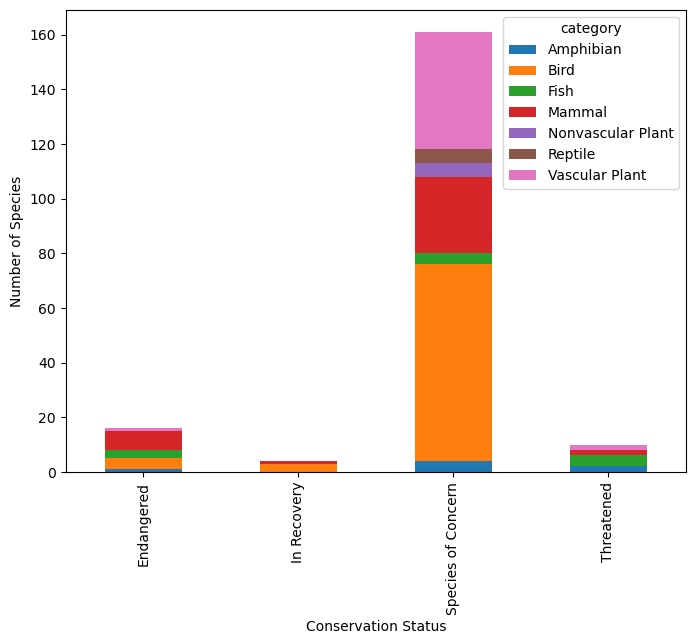

In [118]:
ax = conservationCategory.plot(kind = 'pie', figsize=(8,6), 
                               stacked=Tru)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

#### In Conservation

- The next quest is if cerayin types of species are more likely to be endangered?
- This question is answered by creating a new boolean column called `is_protection` which includes species with value other than `Missing` value.
- And I will groupby `category` and `is_protection`.
- The result where the result is `True` for any species where `conservation_status` is not `Missing` that means the species is at risk and need protection and if a species has `Missing` value is set to `False`, meaning it does not require protection.

In [122]:
species['is_protection'] = species.conservation_status != 'Missing'

- we can see that  Birds, Mammal, and Vascular plants absolute values need protection

In [131]:
category_counts = species.groupby(['category', 'is_protection'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protection',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'no_protection', 'require_protection']

category_counts

,category,no_protection,require_protection
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


- Absolute numbers are not always the most useful for statistics, therefore i will calculate the rate of protection that each category exhibits.

In [136]:
category_counts['percent_protect'] = category_counts.require_protection / \
                                      (category_counts.require_protection + category_counts.no_protection) * 100

category_counts

,category,no_protection,require_protection,percent_protect
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


- In this step, I will determine in which National park the species in the `require_protection` category are located, so that it will help the coservationinst to conserve the species without being endangered.

1. for this I will merge `species` and `observation` dataframe.
2. filter the Merged dataframe for `require_protection` species.
3. finally, groupby `National park` and `species`

In [164]:
merged_data = observation.merge(species, on = 'scientific_name')
protection_species = merged_data[merged_data['is_protection'] == True]
protected_species_in_parks = require_protection.groupby(['park_name','category', 'common_names'])\
['observations']\
.sum()\
.reset_index()
protected_species_in_parks

,park_name,category,common_names,observations
0,Bryce National Park,Amphibian,California Red-Legged Frog,37
1,Bryce National Park,Amphibian,Columbia Spotted Frog,69
2,Bryce National Park,Amphibian,Eastern Hellbender,95
3,Bryce National Park,Amphibian,Mount Lyell Salamander,128
4,Bryce National Park,Amphibian,Pigmy Salamander,95
...,...,...,...,...
755,Yosemite National Park,Vascular Plant,"Trianglelobe Moonwort, Upswept Moonwort",149
756,Yosemite National Park,Vascular Plant,Virginia Spiraea,62
757,Yosemite National Park,Vascular Plant,Winged Water-Starwort,165
758,Yosemite National Park,Vascular Plant,"Wyoming Sand Verbena, Yellowstone Sand Verbena",137


#### Statistical Significance

- coming to next question, Are the differences between species and their conservation status significant?

- I will run chi-squared test to check if different species have statistically significant difference in conservation rates.
- In order to run chi-squared test, we will nedd a `contingency table`
-  I will compare `Mammals and Birds` - contigency1, `Mammals and Reptile` - contigency2
-  you may have question why did i choose chi-squared test? It is because, A chi-squared test is performed to evaluate the independence between protection status and category.
-  `contigency1` table should like this
||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|
- The standard p-value to test statistical significance is 0.05. For the value retrieved from this test between Mammals and Birds, the value of 0.69 is much larger than 0.05.
- The null hypothesis is considered true because the p-valueis greater that 0.05 and states that there is no difference or no association between the groups being compared. The propotion of species that require protection is similar between `Mammals and Birds`. They can be treated with a unified approach, atleast from the perspective of their overall need of protection.

In [206]:
from scipy.stats import chi2_contingency

contingency1 = [[5, 73],
                [30, 146]]
              
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 10.7480315,  67.2519685],
       [ 24.2519685, 151.7480315]]))

#### `Mammals and Reptiles`
- The low p-value suggests that the difference observed isn't just a random occurrence. It implies that `Mammals and Reptiles` genuinely have different levels of conservation need.
- A higher proportion of Mammals require protection, mammals may be more vulnerable or face greater threats compared to reptiles. Conservation efforts might need to be more focused on Mammals, allocating more resources to protect their habitats, manage threats, and monitor their populations.
- However, this doesn't mean Reptiles should be neglected; ongoing monitoring and conservation are still crucial.

In [202]:
contingency2 = [[5,73],
                [5,328]]

chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.513570089848145, pvalue=0.0336269831072617, dof=1, expected_freq=array([[  1.89781022,  76.10218978],
       [  8.10218978, 324.89781022]]))

#### Species in park
- The next set of analysis, Which animal is most prevalent and what is their distribution amongst parks?
 - the first step is to look at the common names from `species` dataframe to get an idea of the most prevalent animals in the dataset.
 - one of the data cleaning tasks is to remove irrelevant data. Punctuation marks are irrelevant or will be counted as a different word though it is of a same word which can interfere with the analysis. 

In [240]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category.isin([ "Mammal","Fish","Bird","Reptile","Amphibian"])]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()
    


common_Names

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Fox', 'Red', 'Fox', 'Silver', 'Fox'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat', 'Red', 'Bat'],
 ['Hoary', 

- The next step is to clean up the duplicate words in each row. To do that, we will employ dictionary and gather all the keys, so that they can stay unique, anyduplicate value will be removed automatically and then convert it back to list.

In [242]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Red', 'Silver'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat'],
 ['Hoary', 'Bat'],
 ['Mississippi', 'Myotis', 'Southeastern'],
 ['Gray', 'Myotis'],
 ['Keens', 'Myotis'],
 ['Eastern', 'SmallFooted'

- Next we will flatten a lists of lists into a single list, with the help of `Chain` function we can complete the task.
- list comprehension is used to flatten the list into a sigle list and checks if there are any no-list elements and they are still handled correctly by wrapping them in a list.

In [244]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated',
 'Domestic',
 'Sheep',
 'Mouflon',
 'Red',
 'Feral',
 'Wapiti',
 'Or',
 'Elk',
 'WhiteTailed',
 'Deer',
 'Feral',
 'Hog',
 'Wild',
 'Pig',
 'Coyote',
 'Gray',
 'Wolf',
 'Red',
 'Wolf',
 'Common',
 'Gray',
 'Fox',
 'Black',
 'Fox',
 'Cross',
 'Red',
 'Silver',
 'Red',
 'Fox',
 'Mountain',
 'Lion',
 'Wild',
 'Cat',
 'Wildcat',
 'Bobcat',
 'Panther',
 'Mountain',
 'Lion',
 'Striped',
 'Skunk',
 'Eastern',
 'Spotted',
 'Skunk',
 'River',
 'Otter',
 'Northern',
 'River',
 'Otter',
 'Fisher',
 'Mink',
 'Or',
 'Weasel',
 'LongTailed',
 'Weasel',
 'Least',
 'Weasel',
 'Mink',
 'Common',
 'Raccoon',
 'Black',
 'Bear',
 'Rafinesques',
 'BigEared',
 'Bat',
 'Big',
 'Brown',
 'Bat',
 'SilverHaired',
 'Bat',
 'Eastern',
 'Red',
 'Bat',
 'Hoary',
 'Bat',
 'Mississippi',
 'Myotis',
 'Southeastern',
 'Gray',
 'Myotis',
 'Keens',
 'Myotis',
 'Eastern',
 'SmallFooted',
 'Bat',
 'Myoti

- next step is the count the occurrences of each species in the flattened list and then creates a dataframe to display.
- From this analysis, `Warbler` occurred 59 times

In [430]:
species_counted = []

for i in res:
    x = res.count(i)
    species_counted.append((i,x))

species_counted_df = pd.DataFrame(set(species_counted), columns =['Species', 'Count']).sort_values("Count", ascending = False).head()
                                                               
species_counted_df

,Species,Count
570,Warbler,59
338,Northern,53
640,Salamander,41
416,Eastern,39
112,American,37


In this data, there might be several different scienctific names for different types of `warbler`.
The next task is to figure out which rows are referring to bats. An new boolean column values will be created to check if `is_warbler` is `True`, and a mix of protected vs. non-protected species.

In [432]:
species['is_warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)
species[species.is_warbler]


,category,scientific_name,common_names,conservation_status,is_protection,is_bat,is_warbler,is_Northern,is_Salamander


- Next, i will link up `observation` dataframe to create a dataframe with observations across four national parks.

In [315]:
warbler_observations = observation.merge(species[species.is_warbler])
warbler_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protection,is_bat,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,Missing,False,False,True
1,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,Missing,False,False,True
2,Helmitheros vermivorus,Yellowstone National Park,291,Bird,Worm-Eating Warbler,Missing,False,False,True
3,Limnothlypis swainsonii,Great Smoky Mountains National Park,56,Bird,Swainson's Warbler,Missing,False,False,True
4,Oreothlypis peregrina,Yellowstone National Park,250,Bird,Tennessee Warbler,Missing,False,False,True
...,...,...,...,...,...,...,...,...,...
231,Dendroica magnolia,Yosemite National Park,163,Bird,Magnolia Warbler,Missing,False,False,True
232,Setophaga petechia,Yosemite National Park,166,Bird,Yellow Warbler,Missing,False,False,True
233,Cardellina pusilla,Yellowstone National Park,240,Bird,Wilson's Warbler,Missing,False,False,True
234,Dendroica pensylvanica,Yellowstone National Park,247,Bird,Chestnut-Sided Warbler,Missing,False,False,True


- Next, I will sum of all observations made in 7 days in all national parks.

In [321]:
warbler_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


- Next I will check for each park for protected or non-protected warbler.
- wow! majority of the population of warbler are taken care. With the highest of 492 `Yellostone National park` has more number of not_protected species.

In [327]:
obs_by_park  = warbler_observations.groupby(['park_name','is_protection']).observations.sum().reset_index()
obs_by_park

,park_name,is_protection,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


- Below is the plot from the output of last data manipulation.
- Every National park need to beef up there efforts in conservation as they have seen more non-protected species.

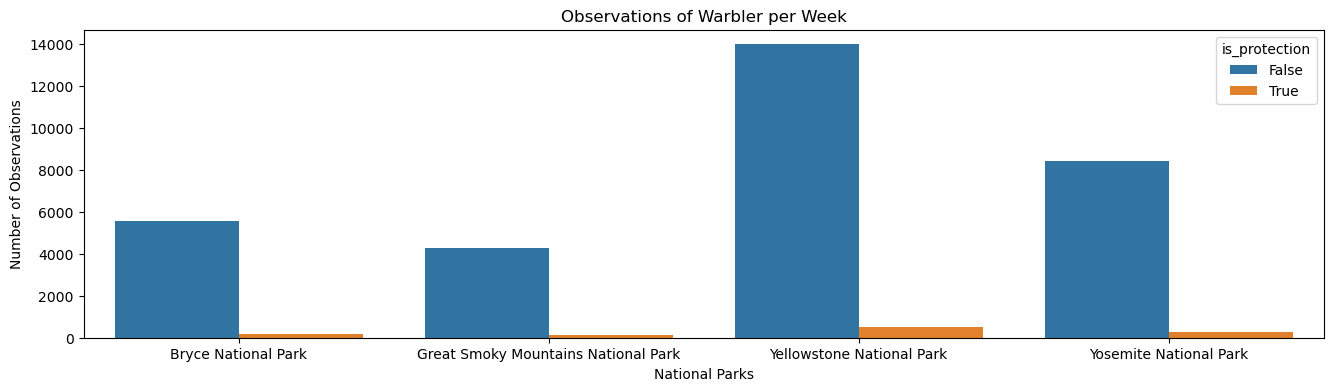

In [405]:
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protection)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warbler per Week')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that Warbler occurred the most number of times and they were most likely to be found in Yellowstone National Park.


## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 